# Notebook to create csv files for TDB

## Imports

In [2]:
import pandas as pd
import numpy as np

#from biosignature_db import plots
#from biosignature_db import data

import plotly.express as px

%load_ext autoreload
%autoreload 2

In [4]:
df = pd.read_json('../data/biosignature.json')

In [5]:
df.to_csv('../data/biosignature.csv', )

In [7]:
pd.read_csv('../data/biosignature.csv')

,Unnamed: 0,biosignature_id,biosignature_cat,biosignature_subcat,name,indicative_of,detection_methods,sample_type,sample_subtype,number of samples,...,mars_counterpart_1,mars_latitude_1,mars_longitude_1,mars_counterpart_2,mars_latitude_2,mars_longitude_2,pub_ref,pub_year,pub_url,status
0,0,1,organics,biomarker,n-alkanes,plants,gc-ms,geological,sedimentary,3,...,"Columbia Hills, Mars",-15.194167,175.485556,NaN,NaN,NaN,Teece et al. (2020),2020,"[Publication](""https://www.liebertpub.com/doi/...",🟢 validated
1,1,2,organics,biomarker,methylalkanes,cyanobacteria,gc-ms,geological,sedimentary,3,...,"Columbia Hills, Mars",-15.194167,175.485556,NaN,NaN,NaN,Teece et al. (2020),2020,"[Publication](""https://www.liebertpub.com/doi/...",🟢 validated
2,2,3,organics,biomarker,n-alkanes,bacteria,gc-ms,geological,sedimentary,4,...,"Columbia Hills, Mars",-15.194167,175.485556,NaN,NaN,NaN,Teece et al. (2020),2020,"[Publication](""https://www.liebertpub.com/doi/...",🟢 validated
3,3,4,organics,biomarker,methylalkanes,cyanobacteria,gc-ms,geological,sedimentary,4,...,"Columbia Hills, Mars",-15.194167,175.485556,NaN,NaN,NaN,Teece et al. (2020),2020,"[Publication](""https://www.liebertpub.com/doi/...",🟢 validated
4,4,5,textures,micro-texture,plant remnant,plants,microscopy,geological,sedimentary,1,...,"Columbia Hills, Mars",-15.194167,175.485556,NaN,NaN,NaN,Hartz et al. (2022),2022,NaN,🟢 validated
5,5,6,organics,biomarker,n-alkanes,plants,gc-ms,geological,sedimentary,1,...,"Columbia Hills, Mars",-15.194167,175.485556,NaN,NaN,NaN,Hartz et al. (2022),2022,NaN,🟢 validated
6,6,7,organics,biomarker,methylalkanes,cyanobacteria,gc-ms,geological,sedimentary,1,...,"Columbia Hills, Mars",-15.194167,175.485556,NaN,NaN,NaN,Hartz et al. (2022),2022,NaN,🟢 validated
7,7,8,organics,biomarker,terpanes,bacteria,gc-ms,geological,sedimentary,1,...,"Columbia Hills, Mars",-15.194167,175.485556,NaN,NaN,NaN,Hartz et al. (2022),2022,NaN,🟢 validated
8,8,9,organics,biomarker,steranes,bacteria,gc-ms,geological,sedimentary,1,...,"Columbia Hills, Mars",-15.194167,175.485556,NaN,NaN,NaN,Hartz et al. (2022),2022,NaN,🟢 validated
9,9,10,textures,micro-texture,plant remnant,plants,microscopy,geological,sedimentary,1,...,"Columbia Hills, Mars",-15.194167,175.485556,NaN,NaN,NaN,Hartz et al. (2022),2022,NaN,🟢 validated


## Create csv files

In [ ]:
# creates four empty dataframes
biosignature_df = pd.DataFrame()
research_df = pd.DataFrame()
researcher_df = pd.DataFrame()
environment_df = pd.DataFrame()

### For `research_df`

In [ ]:
column_names = ['research_id', 'researcher_id', 'methods', 'environment_id',
                'biosignature_id', 'category_of_material', 'subcat_of_material',
                'number_of_samples', 'min_age_of_samples', 'max_age_of_samples', 'url']

In [ ]:
# fills in all dataframes with my research as example
research_id = [1]
researcher_id = [1]
methods = ['GC-MS']
environment_id = [[1,2]]
biosignature_id = [1]
category_of_material = ['geological']
subcat_of_material = ['sedimentary']
number_of_samples = [7]
min_age_of_samples = [0]
max_age_of_samples = [9400]
url = ['https://www.semanticscholar.org/paper/Biomolecules-from-Fossilized-Hot-Spring-Sinters%3A-on-Teece-George/9135d76c4e366de27c8d6f2cb09b3299e2ae3d3b']
columns = [research_id, researcher_id, methods, environment_id, biosignature_id,
           category_of_material, subcat_of_material, number_of_samples, min_age_of_samples, max_age_of_samples, url]

In [ ]:
for index, column in enumerate(column_names):
    research_df[column] = columns[index]

In [ ]:
research_df

### For `researcher_df`

In [ ]:
column_names = ['researcher_id', 'name', 'affiliation', 'url']

In [ ]:
# fills in all dataframes with my research as example
researcher_id = [1]
name = ['B. L. Teece']
affiliation = ['Australian Centre for Astrobiology (ACA) and PANGEA Research Centre,\
                School of Biological, Earth and Environmental Sciences, University of\
                New South Wales Sydney, Sydney, Australia']
url = ['https://www.semanticscholar.org/author/B.-Teece/89948855']
columns = [researcher_id, name, affiliation, url]

In [ ]:
for index, column in enumerate(column_names):
    researcher_df[column] = columns[index]

In [ ]:
researcher_df

### For `biosignature_df`


In [ ]:
column_names = ['biosignature_id', 'category', 'sub_category', 'biosignatures']

In [ ]:
# fills in all dataframes with my research as example
biosignature_id = [1]
category = ['organics']
sub_category = ['hydrocarbons']
biosignatures = [['n-alkanes', 'methylalkanes', 'aromatics']]

columns = [biosignature_id, category, sub_category, biosignatures]

In [ ]:
for index, column in enumerate(column_names):
    biosignature_df[column] = columns[index]

In [ ]:
biosignature_df

### For `environment_df`

In [ ]:
column_names = ['environment_id', 'extreme_conditions', 'location_name', 'latitude', 'longitude', 'et_counterpart']

In [ ]:
# fills in all dataframes with my research as example
environment_id = [1]
extreme_conditions = ['fossilized hot spring sinter']
location_name = ['El Tatio, Chile']
latitude = [-20.333333]
longitude = [-68.016667]
et_counterpart = ['Columbia Hills, Mars']

new_line = [2, 'fossilized hot spring sinter', 'Taupo Volcanic Zone, New Zealand', -38.4, 176.216667, 'Columbia Hills, Mars']

columns = [environment_id, extreme_conditions, location_name, latitude, longitude, et_counterpart]

In [ ]:
environment_df.loc[len(environment_df)] = new_line
environment_df

### Export dataframes to csv

In [ ]:
research_df.to_csv('../raw_data/research.csv')
researcher_df.to_csv('../raw_data/researcher.csv')
biosignature_df.to_csv('../raw_data/biosignature.csv')
environment_df.to_csv('../raw_data/environment.csv')

## Export dataframes to JSON

In [2]:
#publication_df = pd.read_csv('../raw_data/publication.csv')
#author_df = pd.read_csv('../raw_data/author.csv')
#environment_df = pd.read_csv('../raw_data/environment.csv')
biosignature_df = pd.read_csv('../raw_data/biosignature.csv')

In [13]:
biosignature_df.columns

Index(['biosignature_id', 'biosignature_cat', 'biosignature_subcat', 'name',
       'indicative_of', 'detection_methods', 'sample_type', 'sample_subtype',
       'number of samples', 'min_age', 'max_age', 'env_conditions',
       'paleoenvironment', 'location_name', 'latitude', 'longitude',
       'mars_counterpart_1', 'mars_latitude_1', 'mars_longitude_1',
       'mars_counterpart_2', 'mars_latitude_2', 'mars_longitude_2', 'pub_ref',
       'pub_year', 'pub_url'],
      dtype='object')

In [14]:
biosignature_df

,biosignature_id,biosignature_cat,biosignature_subcat,name,indicative_of,detection_methods,sample_type,sample_subtype,number of samples,min_age,...,longitude,mars_counterpart_1,mars_latitude_1,mars_longitude_1,mars_counterpart_2,mars_latitude_2,mars_longitude_2,pub_ref,pub_year,pub_url
0,1,organics,biomarker,n-alkanes,plants,gc-ms,geological,sedimentary,3,0,...,-68.016667,"Columbia Hills, Mars",-15.194167,175.485556,NaN,NaN,NaN,Teece et al. (2020),2020,"[Publication](""https://www.liebertpub.com/doi/..."
1,2,organics,biomarker,methylalkanes,cyanobacteria,gc-ms,geological,sedimentary,3,0,...,-68.016667,"Columbia Hills, Mars",-15.194167,175.485556,NaN,NaN,NaN,Teece et al. (2020),2020,"[Publication](""https://www.liebertpub.com/doi/..."
2,3,organics,biomarker,n-alkanes,bacteria,gc-ms,geological,sedimentary,4,0,...,176.216667,"Columbia Hills, Mars",-15.194167,175.485556,NaN,NaN,NaN,Teece et al. (2020),2020,"[Publication](""https://www.liebertpub.com/doi/..."
3,4,organics,biomarker,methylalkanes,cyanobacteria,gc-ms,geological,sedimentary,4,0,...,176.216667,"Columbia Hills, Mars",-15.194167,175.485556,NaN,NaN,NaN,Teece et al. (2020),2020,"[Publication](""https://www.liebertpub.com/doi/..."
4,5,textures,micro-texture,plant remnant,plants,microscopy,geological,sedimentary,1,20700,...,176.216667,"Columbia Hills, Mars",-15.194167,175.485556,NaN,NaN,NaN,Hartz et al. (2022),2022,NaN
5,6,organics,biomarker,n-alkanes,plants,gc-ms,geological,sedimentary,1,20700,...,176.216667,"Columbia Hills, Mars",-15.194167,175.485556,NaN,NaN,NaN,Hartz et al. (2022),2022,NaN
6,7,organics,biomarker,methylalkanes,cyanobacteria,gc-ms,geological,sedimentary,1,20700,...,176.216667,"Columbia Hills, Mars",-15.194167,175.485556,NaN,NaN,NaN,Hartz et al. (2022),2022,NaN
7,8,organics,biomarker,terpanes,bacteria,gc-ms,geological,sedimentary,1,20700,...,176.216667,"Columbia Hills, Mars",-15.194167,175.485556,NaN,NaN,NaN,Hartz et al. (2022),2022,NaN
8,9,organics,biomarker,steranes,bacteria,gc-ms,geological,sedimentary,1,20700,...,176.216667,"Columbia Hills, Mars",-15.194167,175.485556,NaN,NaN,NaN,Hartz et al. (2022),2022,NaN
9,10,textures,micro-texture,plant remnant,plants,microscopy,geological,sedimentary,1,18000000,...,175.716500,"Columbia Hills, Mars",-15.194167,175.485556,NaN,NaN,NaN,Hartz et al. (2022),2022,NaN


In [3]:
biosignature_df['status'] = " 🟢 validated"

In [16]:
biosignature_df

,biosignature_id,biosignature_cat,biosignature_subcat,name,indicative_of,detection_methods,sample_type,sample_subtype,number of samples,min_age,...,mars_counterpart_1,mars_latitude_1,mars_longitude_1,mars_counterpart_2,mars_latitude_2,mars_longitude_2,pub_ref,pub_year,pub_url,status
0,1,organics,biomarker,n-alkanes,plants,gc-ms,geological,sedimentary,3,0,...,"Columbia Hills, Mars",-15.194167,175.485556,NaN,NaN,NaN,Teece et al. (2020),2020,"[Publication](""https://www.liebertpub.com/doi/...",🟢 validated
1,2,organics,biomarker,methylalkanes,cyanobacteria,gc-ms,geological,sedimentary,3,0,...,"Columbia Hills, Mars",-15.194167,175.485556,NaN,NaN,NaN,Teece et al. (2020),2020,"[Publication](""https://www.liebertpub.com/doi/...",🟢 validated
2,3,organics,biomarker,n-alkanes,bacteria,gc-ms,geological,sedimentary,4,0,...,"Columbia Hills, Mars",-15.194167,175.485556,NaN,NaN,NaN,Teece et al. (2020),2020,"[Publication](""https://www.liebertpub.com/doi/...",🟢 validated
3,4,organics,biomarker,methylalkanes,cyanobacteria,gc-ms,geological,sedimentary,4,0,...,"Columbia Hills, Mars",-15.194167,175.485556,NaN,NaN,NaN,Teece et al. (2020),2020,"[Publication](""https://www.liebertpub.com/doi/...",🟢 validated
4,5,textures,micro-texture,plant remnant,plants,microscopy,geological,sedimentary,1,20700,...,"Columbia Hills, Mars",-15.194167,175.485556,NaN,NaN,NaN,Hartz et al. (2022),2022,NaN,🟢 validated
5,6,organics,biomarker,n-alkanes,plants,gc-ms,geological,sedimentary,1,20700,...,"Columbia Hills, Mars",-15.194167,175.485556,NaN,NaN,NaN,Hartz et al. (2022),2022,NaN,🟢 validated
6,7,organics,biomarker,methylalkanes,cyanobacteria,gc-ms,geological,sedimentary,1,20700,...,"Columbia Hills, Mars",-15.194167,175.485556,NaN,NaN,NaN,Hartz et al. (2022),2022,NaN,🟢 validated
7,8,organics,biomarker,terpanes,bacteria,gc-ms,geological,sedimentary,1,20700,...,"Columbia Hills, Mars",-15.194167,175.485556,NaN,NaN,NaN,Hartz et al. (2022),2022,NaN,🟢 validated
8,9,organics,biomarker,steranes,bacteria,gc-ms,geological,sedimentary,1,20700,...,"Columbia Hills, Mars",-15.194167,175.485556,NaN,NaN,NaN,Hartz et al. (2022),2022,NaN,🟢 validated
9,10,textures,micro-texture,plant remnant,plants,microscopy,geological,sedimentary,1,18000000,...,"Columbia Hills, Mars",-15.194167,175.485556,NaN,NaN,NaN,Hartz et al. (2022),2022,NaN,🟢 validated


In [18]:
biosignature_df[biosignature_df.status == " 🟢 validated"]

,biosignature_id,biosignature_cat,biosignature_subcat,name,indicative_of,detection_methods,sample_type,sample_subtype,number of samples,min_age,...,mars_counterpart_1,mars_latitude_1,mars_longitude_1,mars_counterpart_2,mars_latitude_2,mars_longitude_2,pub_ref,pub_year,pub_url,status
0,1,organics,biomarker,n-alkanes,plants,gc-ms,geological,sedimentary,3,0,...,"Columbia Hills, Mars",-15.194167,175.485556,NaN,NaN,NaN,Teece et al. (2020),2020,"[Publication](""https://www.liebertpub.com/doi/...",🟢 validated
1,2,organics,biomarker,methylalkanes,cyanobacteria,gc-ms,geological,sedimentary,3,0,...,"Columbia Hills, Mars",-15.194167,175.485556,NaN,NaN,NaN,Teece et al. (2020),2020,"[Publication](""https://www.liebertpub.com/doi/...",🟢 validated
2,3,organics,biomarker,n-alkanes,bacteria,gc-ms,geological,sedimentary,4,0,...,"Columbia Hills, Mars",-15.194167,175.485556,NaN,NaN,NaN,Teece et al. (2020),2020,"[Publication](""https://www.liebertpub.com/doi/...",🟢 validated
3,4,organics,biomarker,methylalkanes,cyanobacteria,gc-ms,geological,sedimentary,4,0,...,"Columbia Hills, Mars",-15.194167,175.485556,NaN,NaN,NaN,Teece et al. (2020),2020,"[Publication](""https://www.liebertpub.com/doi/...",🟢 validated
4,5,textures,micro-texture,plant remnant,plants,microscopy,geological,sedimentary,1,20700,...,"Columbia Hills, Mars",-15.194167,175.485556,NaN,NaN,NaN,Hartz et al. (2022),2022,NaN,🟢 validated
5,6,organics,biomarker,n-alkanes,plants,gc-ms,geological,sedimentary,1,20700,...,"Columbia Hills, Mars",-15.194167,175.485556,NaN,NaN,NaN,Hartz et al. (2022),2022,NaN,🟢 validated
6,7,organics,biomarker,methylalkanes,cyanobacteria,gc-ms,geological,sedimentary,1,20700,...,"Columbia Hills, Mars",-15.194167,175.485556,NaN,NaN,NaN,Hartz et al. (2022),2022,NaN,🟢 validated
7,8,organics,biomarker,terpanes,bacteria,gc-ms,geological,sedimentary,1,20700,...,"Columbia Hills, Mars",-15.194167,175.485556,NaN,NaN,NaN,Hartz et al. (2022),2022,NaN,🟢 validated
8,9,organics,biomarker,steranes,bacteria,gc-ms,geological,sedimentary,1,20700,...,"Columbia Hills, Mars",-15.194167,175.485556,NaN,NaN,NaN,Hartz et al. (2022),2022,NaN,🟢 validated
9,10,textures,micro-texture,plant remnant,plants,microscopy,geological,sedimentary,1,18000000,...,"Columbia Hills, Mars",-15.194167,175.485556,NaN,NaN,NaN,Hartz et al. (2022),2022,NaN,🟢 validated


In [4]:
#publication_df.to_json('../biosignature_db/data/publication.json')
#author_df.to_json('../biosignature_db/data/author.json')
biosignature_df.to_json('../biosignature_db/data/biosignature.json')
#environment_df.to_json('../biosignature_db/data/environment.json')

In [24]:
biosignature_json = data.read_json_data('../biosignature_db/data/biosignature.json')

In [25]:
bio_df = pd.DataFrame(biosignature_json)
bio_df.paleoenvironment.unique()

array(['silica-rich hot springs', 'volcanic marine carbonate platform',
       'acidic iron-rich river'], dtype=object)

In [26]:
bio_df.pub_url

0     [Publication]("https://www.liebertpub.com/doi/...
1     [Publication]("https://www.liebertpub.com/doi/...
2     [Publication]("https://www.liebertpub.com/doi/...
3     [Publication]("https://www.liebertpub.com/doi/...
4                                                  None
5                                                  None
6                                                  None
7                                                  None
8                                                  None
9                                                  None
10                                                 None
11                                                 None
12                                                 None
13                                                 None
14                                                 None
15                                                 None
16                                                 None
17                                              

In [54]:
df = bio_df[bio_df['mars_counterpart_1'] == 'Columbia Hills, Mars']
df = df.groupby(['latitude', 'longitude', 'location_name', 'max_age'], as_index=False).sum()[['latitude', 'longitude', 'location_name', 'number of samples', 'max_age']]

In [55]:
df

,latitude,longitude,location_name,number of samples,max_age
0,-38.400000,176.216667,"Taupo Volcanic Zone, New Zealand",8,9400
1,-38.400000,176.216667,"Taupo Volcanic Zone, New Zealand",10,20700
2,-36.932800,175.716500,"Coromandel Volcanic Zone, New Zealand",29,18000000
3,-20.333333,-68.016667,"El Tatio, Chile",6,9400


In [45]:
grouped_df = bio_df.groupby(['latitude', 'longitude', 'location_name', 'biosignature_cat', 'biosignature_subcat']).sum()[['number of samples' ]]

In [46]:
#grouped_df.reset_index(level=['biosignature_cat'], inplace=True)

In [47]:
grouped_df = bio_df.groupby(['latitude', 'longitude', 'location_name', 'max_age']).sum()[['number of samples' ]]

In [48]:
grouped_df.reset_index(level=['max_age'], inplace=True)

In [49]:
grouped_df

max_age  \
latitude   longitude   location_name                                       
-38.400000  176.216667 Taupo Volcanic Zone, New Zealand             9400   
                       Taupo Volcanic Zone, New Zealand            20700   
-36.932800  175.716500 Coromandel Volcanic Zone, New Zealand    18000000   
-21.630556  117.550556 Pilbara Craton, Australia              3430000000   
-20.333333 -68.016667  El Tatio, Chile                              9400   
 37.350000 -6.150000   Rio Tinto, Spain                                0   

                                                              number of samples  
latitude   longitude   location_name                                             
-38.400000  176.216667 Taupo Volcanic Zone, New Zealand                       8  
                       Taupo Volcanic Zone, New Zealand                      10  
-36.932800  175.716500 Coromandel Volcanic Zone, New Zealand                 29  
-21.630556  117.550556 Pilbara Craton, Australia                              5  
-20.333333 -68.016667  El Tatio, Chile                                        6  
 37.350000 -6.150000   Rio Tinto, Spain                                      12

In [35]:
plots.plot_interactive_map(bio_df, projection='mercator')

In [126]:
grouped_cat = bio_df.groupby(['latitude', 'longitude', 'location_name', 'biosignature_cat']).sum()[['number of samples' ]]
grouped_cat.reset_index(level=['biosignature_cat'], inplace=True)

In [127]:
grouped_cat

biosignature_cat  \
latitude   longitude   location_name                                       
-38.400000  176.216667 Taupo Volcanic Zone, New Zealand         organics   
                       Taupo Volcanic Zone, New Zealand         textures   
-36.932800  175.716500 Coromandel Volcanic Zone                 organics   
                       Coromandel Volcanic Zone                 textures   
-21.630556  117.550556 Pilbara Craton, Australia                textures   
-20.333333 -68.016667  El Tatio, Chile                          organics   
 37.350000 -6.150000   Rio Tinto, Spain                   live organisms   
                       Rio Tinto, Spain                         organics   
                       Rio Tinto, Spain                         textures   

                                                         number of samples  
latitude   longitude   location_name                                        
-38.400000  176.216667 Taupo Volcanic Zone, New Zealand                 16  
                       Taupo Volcanic Zone, New Zealand                  2  
-36.932800  175.716500 Coromandel Volcanic Zone                         24  
                       Coromandel Volcanic Zone                          5  
-21.630556  117.550556 Pilbara Craton, Australia                         5  
-20.333333 -68.016667  El Tatio, Chile                                   6  
 37.350000 -6.150000   Rio Tinto, Spain                                  2  
                       Rio Tinto, Spain                                  6  
                       Rio Tinto, Spain                                  4

In [128]:
grouped_cat.index.unique()[0]

(-38.4, 176.216667, 'Taupo Volcanic Zone, New Zealand')

In [129]:
for multiindex in grouped_cat.index.unique():
    px.bar(grouped_cat.loc[multiindex[0], multiindex[1],multiindex[2]].reset_index(), x='biosignature_cat', y='number of samples')

In [132]:
grouped_cat.loc[37.350000, -6.150000,'Rio Tinto, Spain'].reset_index(drop=True)

,biosignature_cat,number of samples
0,live organisms,2
1,organics,6
2,textures,4


In [102]:
px.bar(grouped_cat.loc[37.350000, -6.150000,'Rio Tinto, Spain'].reset_index(), x='biosignature_cat', y='number of samples')

In [119]:
grouped_cat = bio_df.groupby(['latitude', 'longitude', 'location_name', 'detection_methods']).sum()[['number of samples' ]]
grouped_cat.reset_index(level=['detection_methods'], inplace=True)

In [124]:
grouped_cat

detection_methods  \
latitude   longitude   location_name                                          
-38.400000  176.216667 Taupo Volcanic Zone, New Zealand               gc-ms   
                       Taupo Volcanic Zone, New Zealand  optical microscopy   
-36.932800  175.716500 Coromandel Volcanic Zone                       gc-ms   
                       Coromandel Volcanic Zone                   naked eye   
                       Coromandel Volcanic Zone          optical microscopy   
-21.630556  117.550556 Pilbara Craton, Australia                  naked eye   
-20.333333 -68.016667  El Tatio, Chile                                gc-ms   
 37.350000 -6.150000   Rio Tinto, Spain                                ftir   
                       Rio Tinto, Spain                                 sem   

                                                         number of samples  
latitude   longitude   location_name                                        
-38.400000  176.216667 Taupo Volcanic Zone, New Zealand                 16  
                       Taupo Volcanic Zone, New Zealand                  2  
-36.932800  175.716500 Coromandel Volcanic Zone                         24  
                       Coromandel Volcanic Zone                          1  
                       Coromandel Volcanic Zone                          4  
-21.630556  117.550556 Pilbara Craton, Australia                         5  
-20.333333 -68.016667  El Tatio, Chile                                   6  
 37.350000 -6.150000   Rio Tinto, Spain                                  6  
                       Rio Tinto, Spain                                  6

In [125]:
grouped_cat.loc[37.350000, -6.150000,'Rio Tinto, Spain']

detection_methods  number of samples
latitude longitude location_name                                        
37.35    -6.15     Rio Tinto, Spain              ftir                  6
                   Rio Tinto, Spain               sem                  6

## Plot coordinates on 3D globe

In [115]:
from IPython.display import Markdown, display

display(Markdown('<br>'.join(
    f'<span style="font-family: monospace">{color} <span style="color: {color}">████████</span></span>'
    for color in px.colors.qualitative.Plotly
)))

<span style="font-family: monospace">#636EFA <span style="color: #636EFA">████████</span></span><br><span style="font-family: monospace">#EF553B <span style="color: #EF553B">████████</span></span><br><span style="font-family: monospace">#00CC96 <span style="color: #00CC96">████████</span></span><br><span style="font-family: monospace">#AB63FA <span style="color: #AB63FA">████████</span></span><br><span style="font-family: monospace">#FFA15A <span style="color: #FFA15A">████████</span></span><br><span style="font-family: monospace">#19D3F3 <span style="color: #19D3F3">████████</span></span><br><span style="font-family: monospace">#FF6692 <span style="color: #FF6692">████████</span></span><br><span style="font-family: monospace">#B6E880 <span style="color: #B6E880">████████</span></span><br><span style="font-family: monospace">#FF97FF <span style="color: #FF97FF">████████</span></span><br><span style="font-family: monospace">#FECB52 <span style="color: #FECB52">████████</span></span>

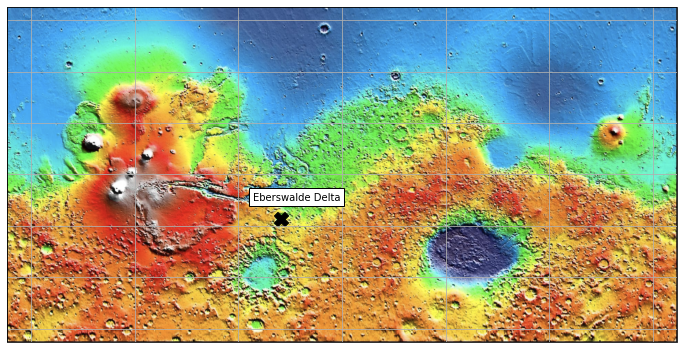

In [58]:
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

fig = plt.figure(figsize=(12, 12))
img_extent = (-180, 180, -90, 90)

img = plt.imread('mars.png')

ax = plt.axes(projection=ccrs.Mercator())
# image data coming from server, code not shown
ax.imshow(img, origin='upper', extent=img_extent)
ax.set_xmargin(0.05)
ax.set_ymargin(0.10)

ax.gridlines()
plt.scatter(-33,-24, s= 200, c='black', marker= 'X')
plt.text(-48, -14, "Eberswalde Delta", bbox=dict(facecolor='white'))

plt.savefig('mars_map_eberswalde.png')
#plt.show() 